# Tutorial on PathTree Visualization

We will use the results from the mstis example. So make sure this has been run (not analyzed) before and the `mstis.nc` file exists.

The usual import

In [1]:
import openpathsampling as paths

Import visualization as `vis` for convenience

In [2]:
import openpathsampling.visualize as vis

And use output for SVG in IPython notebooks

In [3]:
from IPython.display import SVG

Load the storage into memory.

In [4]:
storage = paths.AnalysisStorage("mstis.nc")

Track down the list of samples that lead to the existance of the last sample in storage (called the heritage)

Create a `PathTree` object that will create the path tree SVG us. In most cases we are investigating samples in the context of simuation MC steps and hence we will initialize the `PathTree` object with the steps, that we are interested in.

Each tree displays a specific ordered list of samples. These needs to be specified, which we do using a `SampleList` generating object, a `SampleListGenerator`. Typical generators are the `ReplicaEvolution` or `SampleAncestor` or `EnsembleEvolution`.

In [5]:
pt = vis.PathTree(
    storage.steps,
    vis.ReplicaEvolution(replica=1)
)

Now we are set to add a generator (you can of course add the generator as a second argument

Let's look at some possible options before we plot

##### `.generator` options

The generator is a itself a `SampleList` object. It has some options about how the contained samples should be analyzed for their correlation.

```
time_symmetric : bool
    If `True` snapshots and its reversed counterpart are treated as the 
    same configuration
```

In [6]:
pt.generator.time_symmetric = True

```
flip_time_direction : bool
    If `True` then the use of a reversal in time evolution of trajectories 
    (so far only Reversesal moves to that) will cause the plot to also 
    reverse its current "sense of time". If False time is always drawn from 
    left to right. While having the disadvantage of distorting the view of 
    time, this has the advantage that snapshots after a reversal will still 
    be align beneath and so the apparent correlation between paths after a 
    reversal is directly visible.
```

In [7]:
pt.generator.flip_time_direction = False

```
joined_blocks : bool
    If `True` then snapshot blocks and joined into a large block. This remove
    the possibility to see the optional CV value per snapshot but increases
    generation of the image a lot.
```

Set some options for the SVG output before rendering it.

### `.options`

Styling and other settings are set in `.options`

##### CSS

CSS are things that affect the css directly like shape, size and overall appearance.

`scale_x` and `scale_y` is the distance in pixels between two blocks. Since the figure can be scaled arbitrarily only the relative number matters. Still it is useful to pick a default size in the browser. 

`zoom` will be applied to the whole image and might be useful for saving and printing. 

In [8]:
pt.options.css['scale_x'] = 2
pt.options.css['scale_y'] = 24
pt.options.css['zoom'] = 1.0

`width` applies to the output scaling in a browser. Typical choices are `inherit` which will leave the actual number of pixels and result in the same block size independent of the number of snapshots per trajectory. `xxx%` which will scale the whole image to fit a certain percentage of the available space. `xxxpx` will scale the whole image to fit exactly into the given number of pixels. In general all css conform widths are supported.

In [9]:
pt.options.css['width'] = 'inherit'

`horizontal_gap` is a bool and if set to true it will make each snapshot be separated by a little gap. If turned off you will get continuous blocks.

In [10]:
pt.options.css['horizontal_gap'] = False

`mark_transparent` sets the reason when samples will be shown transparent. 

1. `rejected` (default): transparent, if the sample originated in a rejected step. Useful for analyzing steps
2. `auxiliary`: transparent, if the sample is not necessary to construct the last sample and 
3. `submove`: transparent, if the sub_move was rejected. This is different from 1. in that 1. only check acceptance of the root_mover

In [11]:
pt.options.css['mark_transparent'] = 'rejected'

##### UI

UI are things that affect which content will be shown, such as additional legends, hints, virtual samples, etc.

`correlation`, `sample`, `ensemble`, `replica`, `bias`, `step` are parts of the legends that can be chosen. 

In [12]:
pt.options.ui['legends'] = [ 'correlation', 'sample', 'ensemble', 'step', 'bias', 'replica']

The last option sets whether to show the value of a collective variable

In [13]:
pt.options.ui['cv'] = True

##### Mover

The mover category contains information on how to plot certain mover types.

```py
pt.options.movers[mover_type]['name'] = '...'
pt.options.movers[mover_type]['suffix'] = '...'
pt.options.movers[mover_type]['overlap_label'] = '...'

pt.options.movers[mover_type]['label_position'] = 'left' or 'right'

pt.options.movers[mover_type]['overlap'] = '...'
pt.options.movers[mover_type]['new'] = '...'
pt.options.movers[mover_type]['reversed'] = '...'
pt.options.movers[mover_type]['full'] = '...'


pt.options.movers[mover_type]['cls'] = '...'
```

##### Direct attribute settings

`.op` will reference a function that is used to determined the text inside each snapshot. If `None` nothing will be displayed. A common choice if the `.idx` function of the used storage. This will use the index of the snapshot stored. If it is set to `None` it will be ignored. Note, that if you will join blocks then this will also be ignored since no blocks will be plotted.

In [14]:
#pt.op = storage.idx
pt.op = None

`.states` is a dictionary which will reference boolean CVs with a color. If the CV will return True for a snapshots a block of the given color is put below the snapshot. This way certain states can be marked and seen if trajectories are of the correct type.

In [15]:
pt.states = {
    'orange' : storage.volumes[0]
}

In [16]:
pt.states = {}

Finally tell the builder to render the SVG and put it out. This might take a few seconds if the plot is large.

Let's start fresh and set some options altogether.

In [17]:
reload(vis)

<module 'openpathsampling.visualize' from '/Users/jan-hendrikprinz/Studium/git/openpathsampling/openpathsampling/visualize.pyc'>

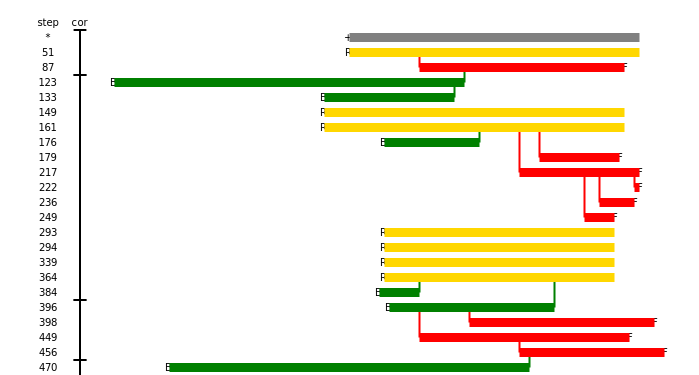

In [18]:
ptb = vis.PathTree(
    storage.steps, 
    vis.ReplicaEvolution(1, True)
)
SVG(ptb.svg())

You can always change setting of the generator or replace the generator completely. Changing the steps is possible as well. The necessary analysis is internally triggered as necessary.

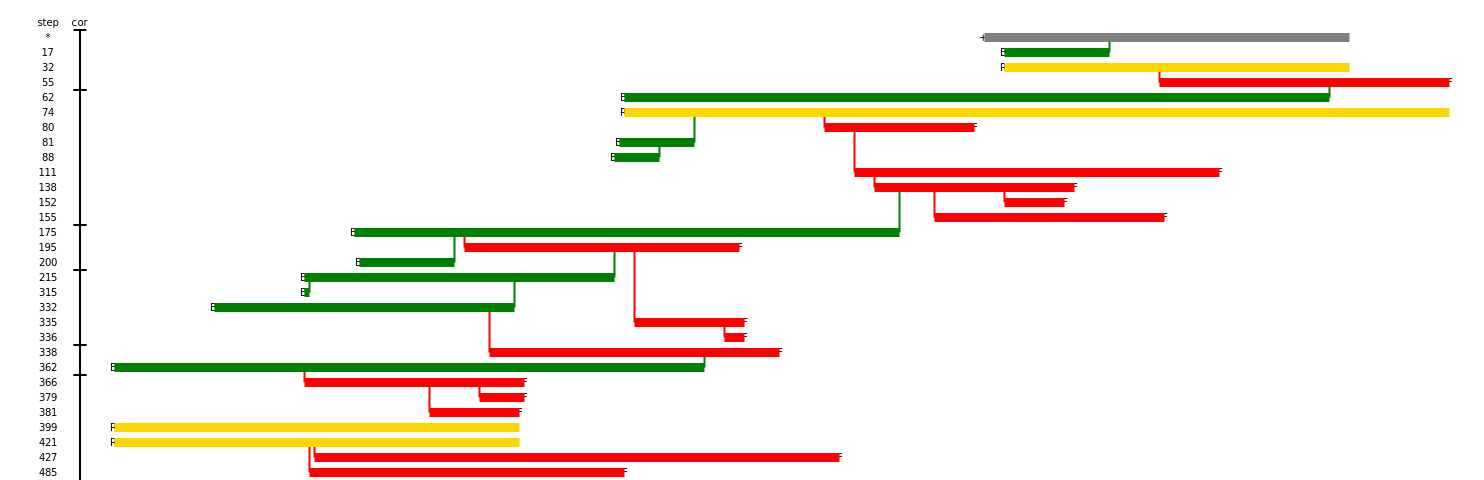

In [19]:
ptb.generator.replica = 4
SVG(ptb.svg())

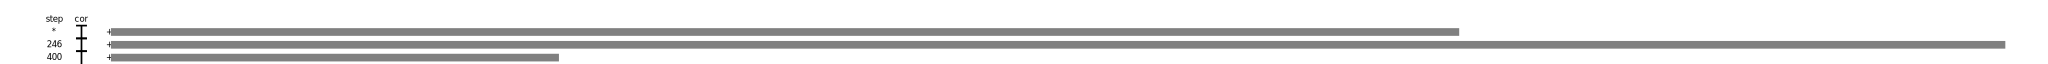

In [20]:
ensemble = storage.samplesets[0].ensembles[0]
ptb.generator = vis.EnsembleEvolution(ensemble, True)
SVG(ptb.svg())

In [21]:
ptb.generator = vis.SampleAncestors(storage.samplesets.last.samples[4])

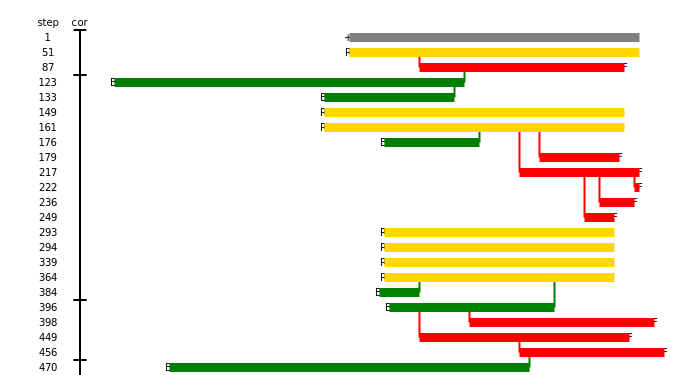

In [22]:
SVG(ptb.svg())

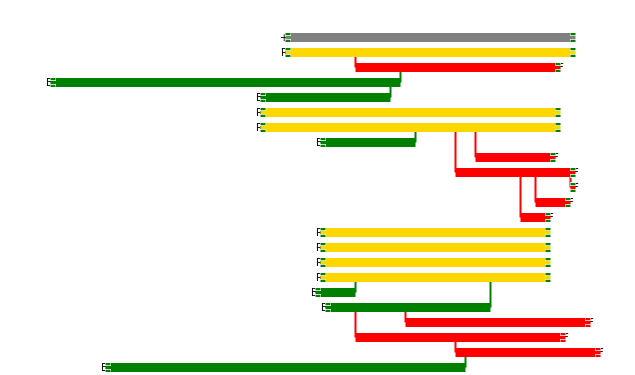

In [23]:
ptb.states = {
    'red': storage.volumes['A'],
    'green': storage.volumes['B'],
    'blue': storage.volumes['C']
}
ptb.options.ui['legends'] = []
SVG(ptb.svg())

Let's do something fancy and color each snapshot

In [24]:
# load all 3 collective variables
cvA = storage.cvs['opA']
cvB = storage.cvs['opB']
cvC = storage.cvs['opC']

# and compute their maximum
mxA = max(cvA(storage.snapshots.all()))
mxB = max(cvB(storage.snapshots.all()))
mxC = max(cvC(storage.snapshots.all()))

For this we need a color function that returns a valid SVG color for each snapshot.

In [25]:
svg_colorfunction = lambda x: 'rgb(' + \
    str(int(255 * (1 - cvA(x) / mxA))) + ',' + \
    str(int(255 * (1 - cvB(x) / mxB))) + ',' + \
    str(int(255 * (1 - cvC(x) / mxC))) + ')'

It looks a little complicated, so let's see what it does. And compute the color of snapshot zero.

In [26]:
svg_colorfunction(storage.snapshots[0])

'rgb(255,148,101)'

Here we color according to the proximity to states `A` (red), `B` (green) and `C` (blue). You  see, that all paths that are not in the right ensemble are rejected!

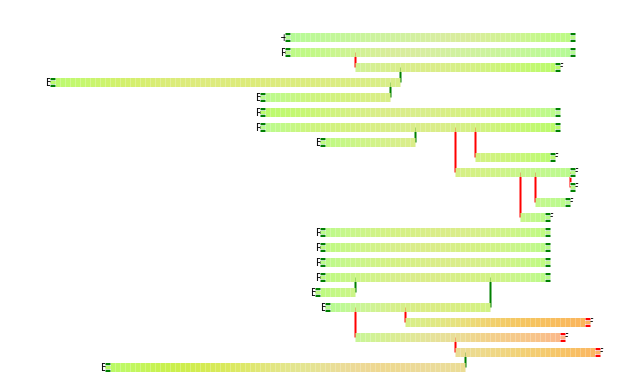

In [27]:
# set all trajectory parts to single mode to see something
# as an example this will change the default way new parts 
# (usually shooting / extention) are displayed. `single`
# means each snapshot as a single block
ptb.options.movers['default']['new'] = 'single'

ptb.options.movers['default']['reversed'] = 'single'
ptb.options.movers['default']['overlap'] = 'none'
ptb.options.movers['default']['full'] = 'single'

# and set the color function we defined before
ptb.coloring = svg_colorfunction

SVG(ptb.svg())

#### Trajectory Parts

Each trajectory plotted is split into 4 possible parts. That are exclusive and can be set to different output modes.

###### new
all snapshots that are new. These are usually the forward of backward shooting parts

###### overlap
the part that is in common with the previous one

###### reversed
the part that is in common with the previous one if you would reverse it

###### full
if overlap is actually the full trajectory is is named full


#### Correlation

The `SampleList` object residing in `.generator` can check for decorrelation/correlation in the list that is generates. The meaning depends on what list of samples is analyzed, but looking replicas or ensembles you can count the number of completely _independent_ trajectories, i.e. trajectories that do not have any snapshot in common.

In [28]:
decorrelated = ptb.generator.decorrelated
print "We have " + str(len(decorrelated)) + " decorrelated samples."

We have 4 decorrelated samples.


An let's look at the steps these were generated

In [29]:
cycles = map(ptb.steps.get_mccycle, decorrelated)
print cycles
print 'Average of %.1f cycles per decorrelated sample' % (1.0 * (cycles[-1] - cycles[0]) / (len(cycles) - 1))

[1, 123, 396, 470]
Average of 156.3 cycles per decorrelated sample


#### Useful options

##### Values on single frame/snapshots

You can add a value to each snapshot

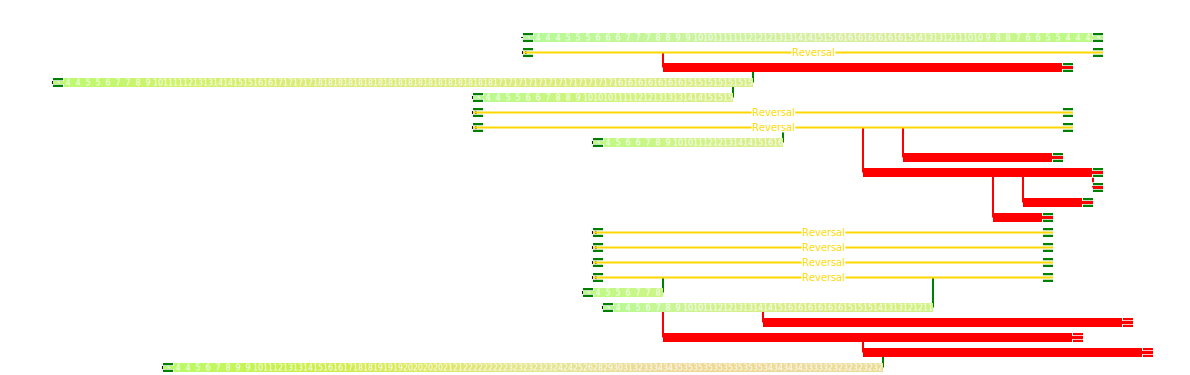

In [30]:
# Use the `.idx` function of the storage as values for each snapshot.
ptb.op = lambda x: '%d' %(100 * cvB(x))

# Adjust the width of each snapshot
ptb.options.css['scale_x'] = 10

# Set the width to use native pixels and reflect the actual size of the SVG
ptb.options.css['width'] = '100%'

# Use the default setting and say that all new snapshots should be plotted as single
ptb.options.movers['default']['new'] = 'single'
ptb.options.movers['default']['overlap'] = 'none'
ptb.options.movers['default']['reversed'] = 'line'
ptb.options.movers['default']['full'] = 'line'

# override the default for ForwardShootMoves. These will have no cvs in them
ptb.options.movers['ForwardShootMover']['new'] = 'block'

ptb.coloring = svg_colorfunction

# Allow to flip the time direction to better match reversible moves. BEWARE that the direction
# of time has no meaning here. It is exclusivey to study decorrelation of generated paths.
ptb.generator.flip_time_direction = False

SVG(ptb.svg())

##### Reset options

Return to the stardard view

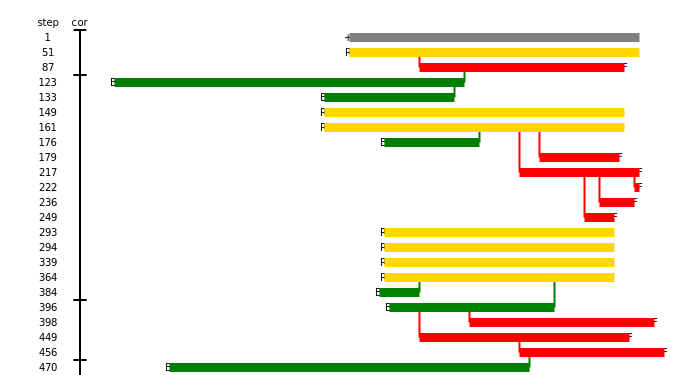

In [31]:
ptb.reset()
SVG(ptb.svg())

In [32]:
storage.close()